# Part-of-Speech tags correlations over desambiguated corpus

Correlations of part-of-speech tags of words with word2bits vectors. Vectors are trained over the corpus of words having bound PoS tags, uniquely identifying a meaning of words from context.

- PoS are all possible tags occurring with given word, as retrieved by Majka.
- Word vectors are binary vectors embedded independently.

We hope to see some attributes of word vectors to significantly correlate with some of the 36 tags' vectors. Therefore, we create a matrix of all correlations between PoS tags <> word vectors.

In [23]:
import pandas as pd
from nltk.corpus import wordnet as wn

vec_length = 30
epochs = 10

vecs_df = pd.read_csv("../vectors_brown/1b%sd_vectors_e%s_nonbin" % (vec_length, epochs), 
                      skiprows=[0], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

1   2   3   4   5   6   7   8   9   10 ...  21  22  23  24  25  26  \
0                                                ...                           
</s>       1   1   0   0   0   1   0   0   0   0 ...   0   0   0   1   0   1   
the_AT     0   1   0   0   0   1   1   0   1   1 ...   0   0   1   1   1   0   
of_IN      1   0   0   1   0   0   0   1   0   0 ...   1   1   0   0   0   0   
and_CC     1   0   0   1   1   0   0   1   0   0 ...   1   1   0   0   0   0   
a_AT       1   0   0   1   1   0   0   1   0   0 ...   1   1   0   0   0   0   
in_IN      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
to_TO      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
to_IN      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
is_BEZ     1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
was_BEDZ   1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
for_IN     1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
with_IN    1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
The_AT     1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
he_PPS     1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
that_CS    1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
his_PP$    1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
be_BE      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
on_IN      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
;_.        1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   
as_CS      1   0   1   1   1   0   0   1   0   0 ...   1   1   0   0   0   1   

          27  28  29  30  
0                         
</s>       0   0   1   0  
the_AT     1   1   1   0  
of_IN      0   0   0   1  
and_CC     0   0   0   1  
a_AT       0   0   0   1  
in_IN      0   0   0   1  
to_TO      0   0   0   1  
to_IN      0   0   0   1  
is_BEZ     0   0   0   1  
was_BEDZ   0   0   0   1  
for_IN     0   0   0   1  
with_IN    0   0   0   1  
The_AT     0   0   0   1  
he_PPS     0   0   0   1  
that_CS    0   0   0   1  
his_PP$    0   0   0   1  
be_BE      0   0   0   1  
on_IN      0   0   0   1  
;_.        0   0   0   1  
as_CS      0   0   0   1  

[20 rows x 30 columns]

In [24]:
# get rid of words with weird tags
vecs_df = vecs_df[list(map(lambda x: 2 <= len(x.split("_")[1]) <= 3 if "_" in x else False, vecs_df.index))]

In [25]:
vecs_df.describe()

1             2             3             4             5   \
count  14929.000000  14929.000000  14929.000000  14929.000000  14929.000000   
mean       0.933619      0.068256      0.794293      0.905754      0.858597   
std        0.248955      0.252194      0.404231      0.292181      0.348448   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      1.000000      1.000000   
50%        1.000000      0.000000      1.000000      1.000000      1.000000   
75%        1.000000      0.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 6             7             8             9             10  \
count  14929.000000  14929.000000  14929.000000  14929.000000  14929.000000   
mean       0.064974      0.061692      0.915734      0.060151      0.063032   
std        0.246489      0.240603      0.277795      0.237775      0.243028   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           ...                 21            22            23            24  \
count      ...       14929.000000  14929.000000  14929.000000  14929.000000   
mean       ...           0.909371      0.928863      0.063769      0.085203   
std        ...           0.287090      0.257062      0.244348      0.279193   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           1.000000      1.000000      0.000000      0.000000   
50%        ...           1.000000      1.000000      0.000000      0.000000   
75%        ...           1.000000      1.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

                 25            26            27            28            29  \
count  14929.000000  14929.000000  14929.000000  14929.000000  14929.000000   
mean       0.083931      0.794695      0.117489      0.058611      0.066180   
std        0.277293      0.403938      0.322013      0.234903      0.248605   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 30  
count  14929.000000  
mean       0.938241  
std        0.240725  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 30 columns]

In [26]:
def tags_for_word(word):
     return set([lemma["tags"]["other"] for lemma in morph.find(str(word))])

In [27]:
all_tags = set(map(lambda word_tag: word_tag.split("_")[1] 
                   if "_" in word_tag else " ", vecs_df.index))
all_tags

{'--',
 'ABL',
 'ABN',
 'ABX',
 'AP',
 'AP$',
 'AT',
 'BE',
 'BED',
 'BEG',
 'BEM',
 'BEN',
 'BER',
 'BEZ',
 'CC',
 'CD',
 'CS',
 'DO',
 'DO*',
 'DOD',
 'DOZ',
 'DT',
 'DT$',
 'DTI',
 'DTS',
 'DTX',
 'EX',
 'HV',
 'HV*',
 'HVD',
 'HVG',
 'HVN',
 'HVZ',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'JJT',
 'MD',
 'MD*',
 'NIL',
 'NN',
 'NN$',
 'NNS',
 'NP',
 'NP$',
 'NPS',
 'NR',
 'NR$',
 'NRS',
 'OD',
 'PN',
 'PN$',
 'PP$',
 'PPL',
 'PPO',
 'PPS',
 'QL',
 'QLP',
 'RB',
 'RB$',
 'RBR',
 'RBT',
 'RP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBZ',
 'WDT',
 'WP$',
 'WPO',
 'WPS',
 'WQL',
 'WRB'}

In [28]:
len(all_tags)

77

In [29]:
for tag in all_tags:
    vecs_df[tag] = [1 if word.endswith(tag) else 0 for word in vecs_df.index]

In [30]:
vecs_df.head()

1  2  3  4  5  6  7  8  9  10 ...  QL  PN  HVN  HV*  NR$  NIL  PPO  \
0                                     ...                                    
the_AT  0  1  0  0  0  1  1  0  1   1 ...   0   0    0    0    0    0    0   
of_IN   1  0  0  1  0  0  0  1  0   0 ...   0   0    0    0    0    0    0   
and_CC  1  0  0  1  1  0  0  1  0   0 ...   0   0    0    0    0    0    0   
a_AT    1  0  0  1  1  0  0  1  0   0 ...   0   0    0    0    0    0    0   
in_IN   1  0  1  1  1  0  0  1  0   0 ...   0   0    0    0    0    0    0   

        DTI  DOD  RB  
0                     
the_AT    0    0   0  
of_IN     0    0   0  
and_CC    0    0   0  
a_AT      0    0   0  
in_IN     0    0   0  

[5 rows x 107 columns]

/home/michal/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


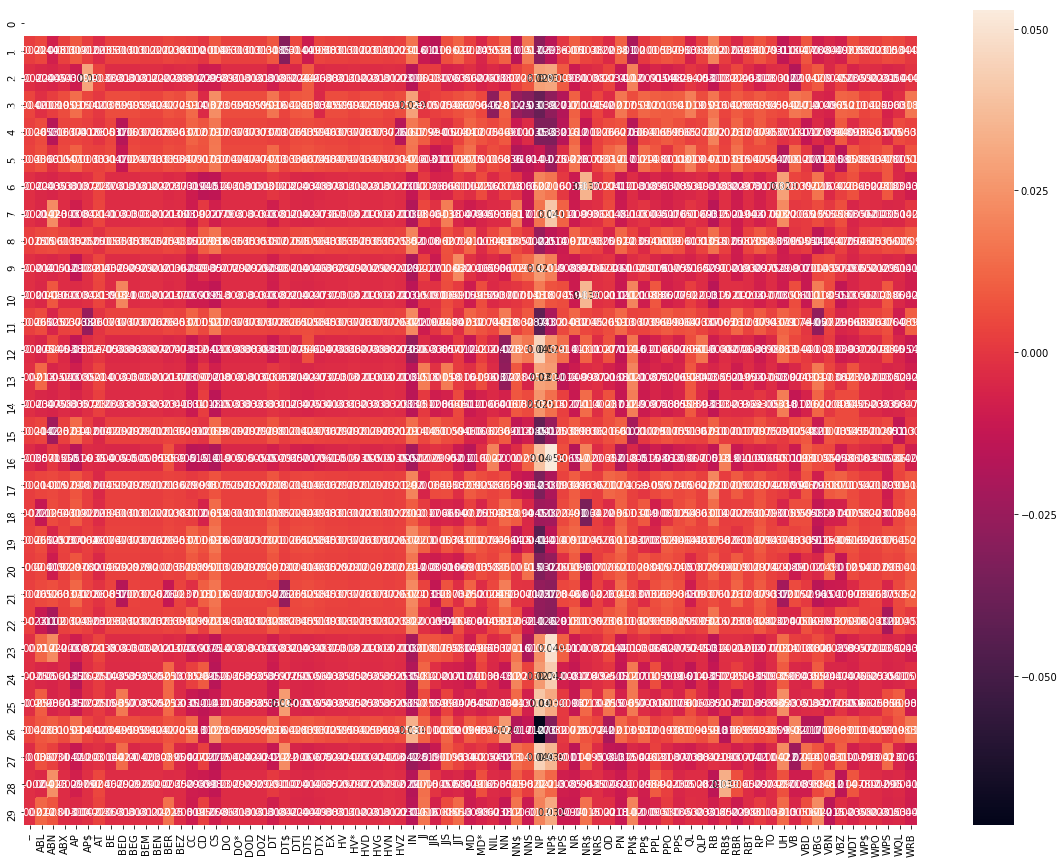

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
corr_df = corr_df.sort_index(axis=1)
plt.figure(figsize = (20, 15))
sns.heatmap(corr_df, annot=True)

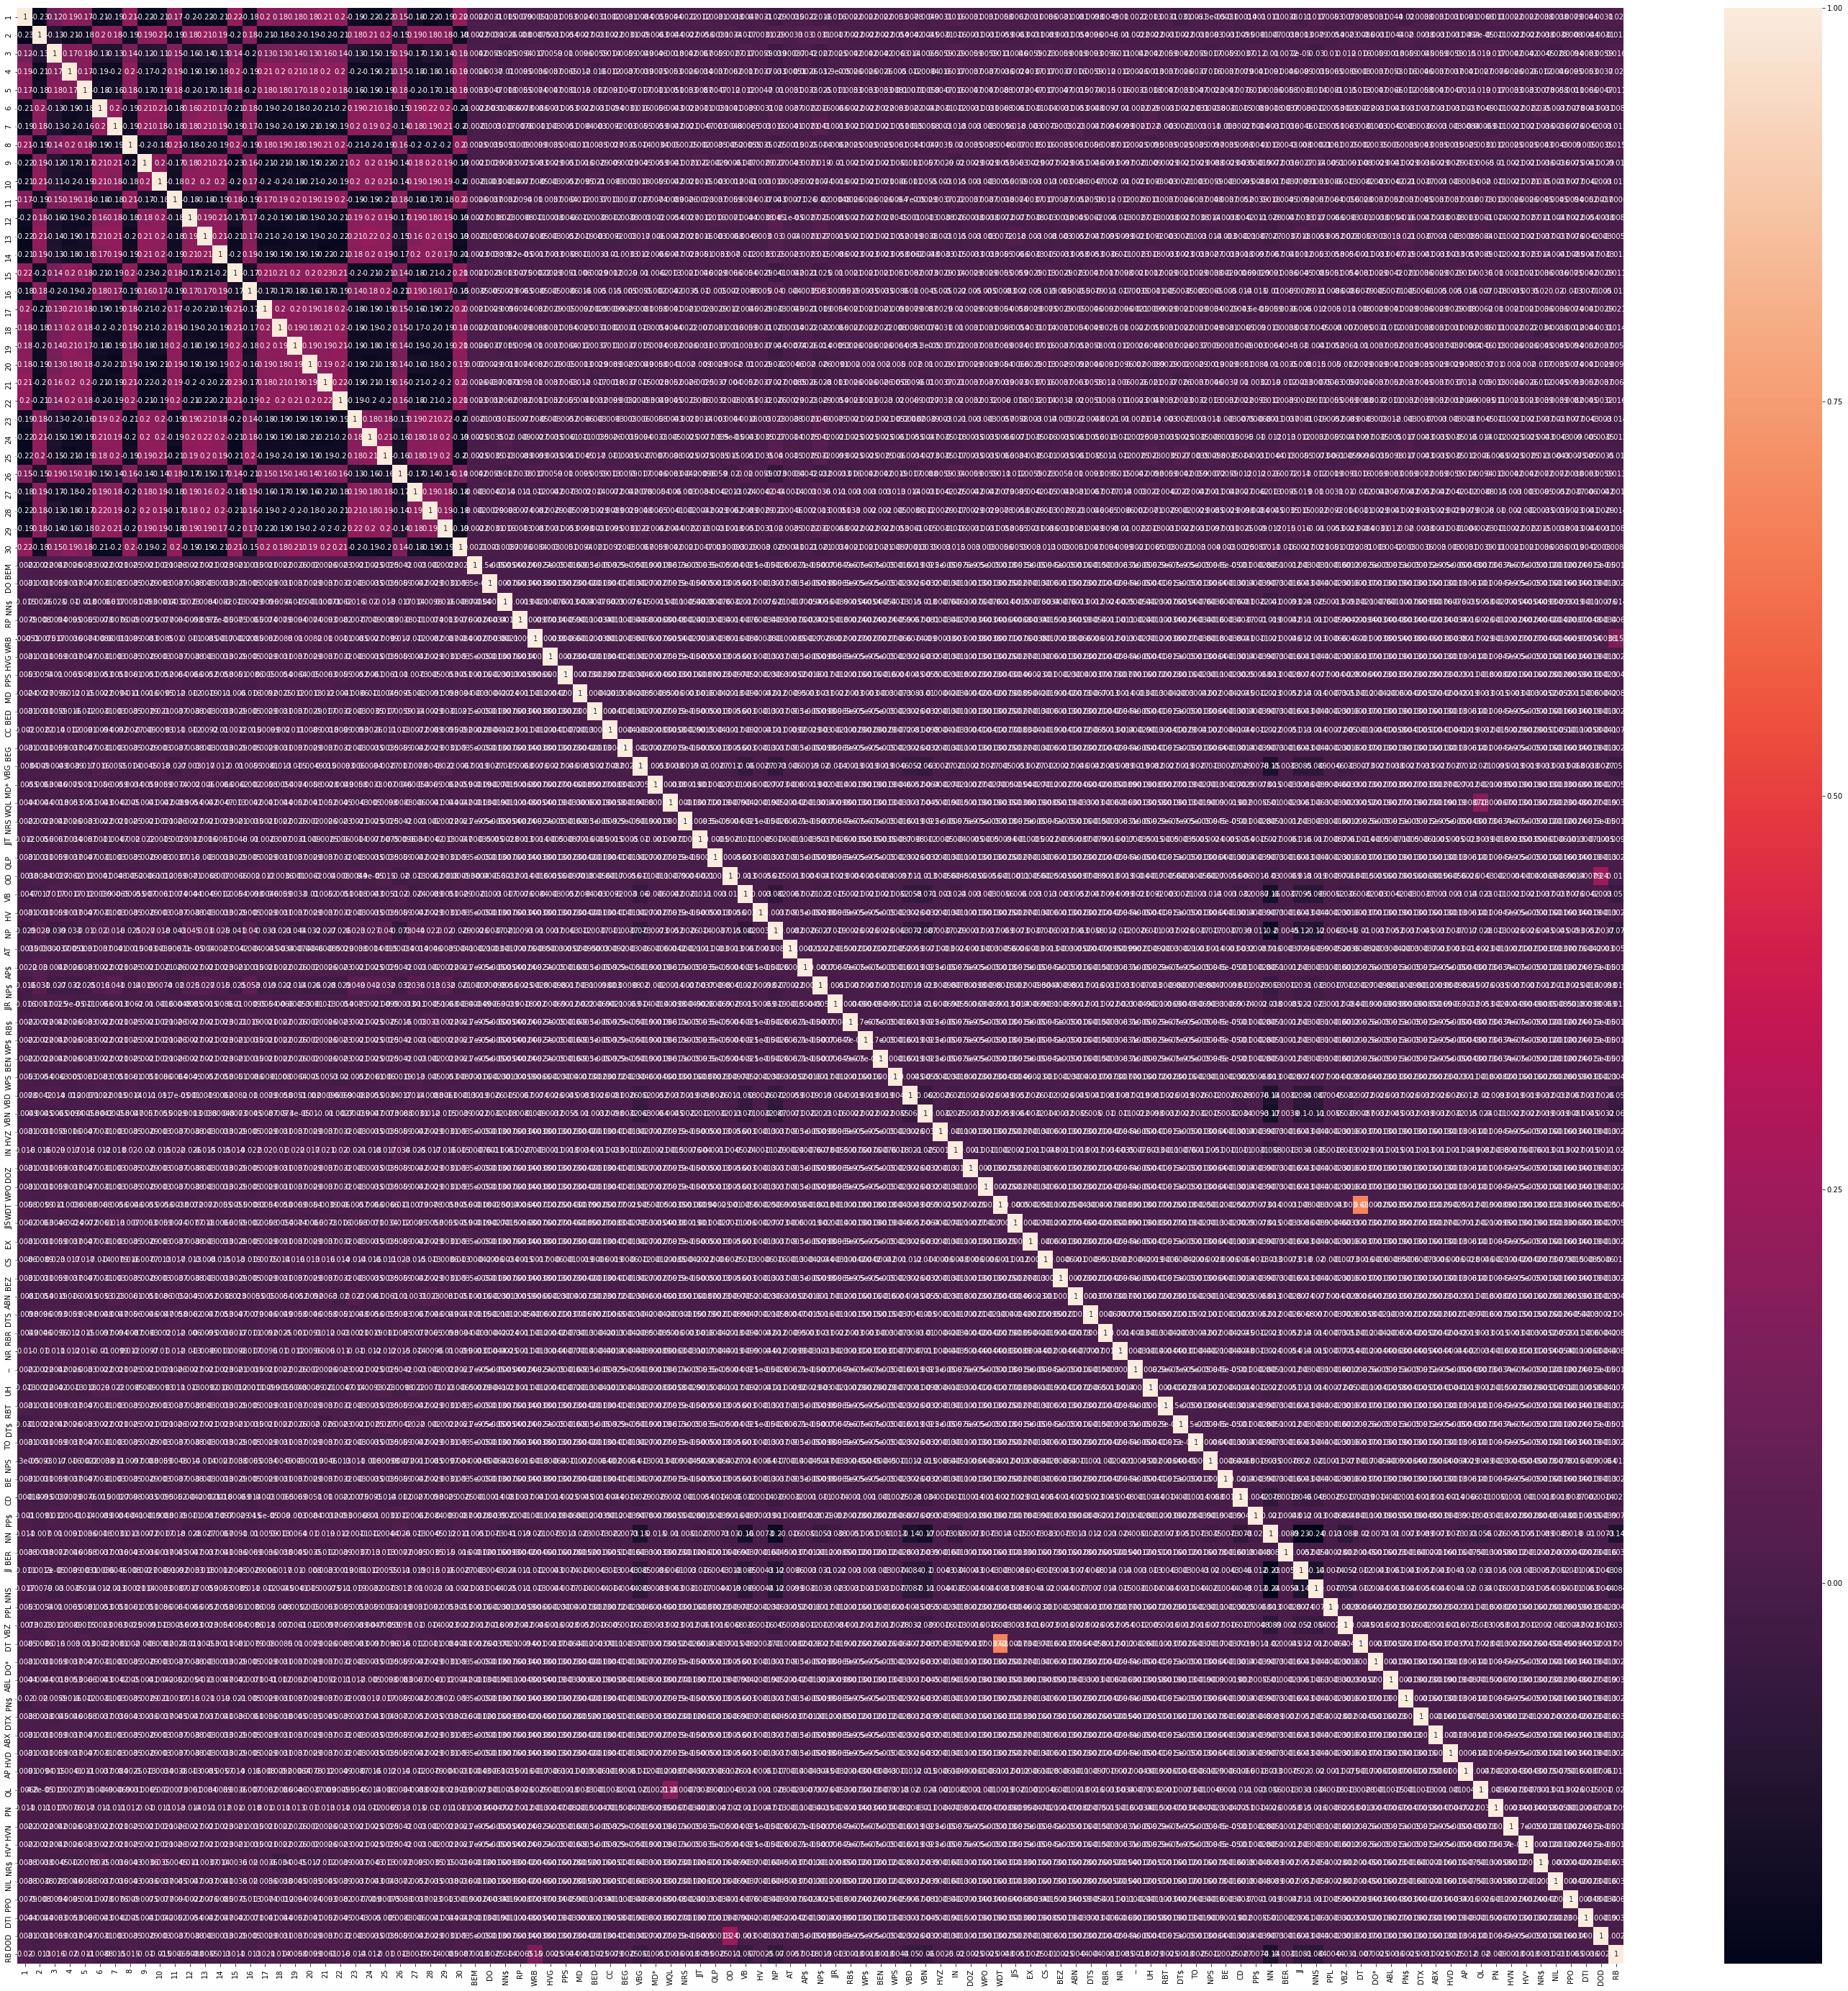

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt



corr_df = vecs_df.corr()

plt.figure(figsize = (50, 50))
sns.heatmap(corr_df, annot=True)

### Iteration over correlations

Inspect a level of top correlation depending on a size of word2bit vector. 

In [36]:
def top_corr_for_vecfile(vecfile_path):
    vecs_df = pd.read_csv(vecfile_path, skiprows=[0], header=None, sep=" ")
    vecs_df = vecs_df.set_index(0)
    vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
    vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
    vecs_df = vecs_df.replace(vecs_df.values.min(), 0)

    vecs_df = vecs_df.astype('int8')
    
    for tag in all_tags:
        vecs_df[tag] = [1 if word.endswith(tag) else 0 for word in vecs_df.index]
    
    corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
    return corr_df.max()

In [37]:
epochs = 10

vec_range = []
vec_range.extend(list(range(10, 110, 10)))
print(vec_range)
vec_files = ["../vectors_tokenized/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
    corr_for_dims_df["%s dims" % vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


/home/michal/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


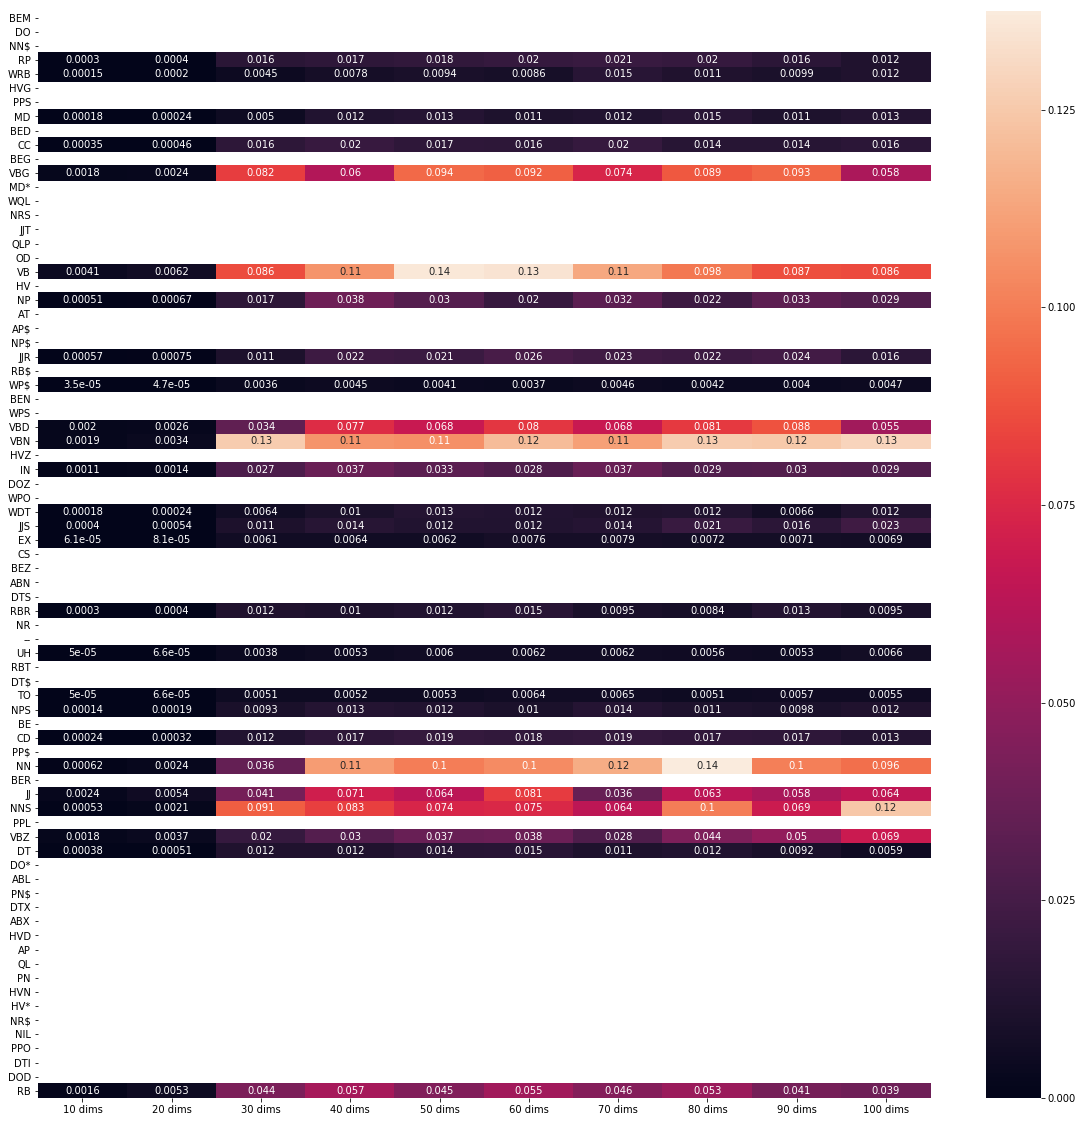

In [38]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

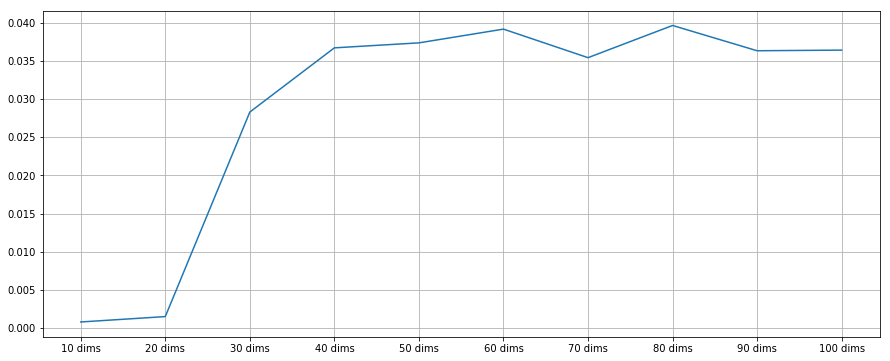

In [39]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

In [40]:
corr_for_dims_df = pd.DataFrame()

In [42]:
epochs = 10

vec_range = list(range(10, 200, 10)) + list(range(200, 620, 20))
print(vec_range)
vec_files = ["../vectors_brown/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
    corr_for_dims_df[vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])
    
corr_for_dims_df.sort_index(inplace=True, axis=1)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]


/home/michal/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


In [43]:
# corr_for_dims_df.columns = [int(str_i[2:]) for str_i in corr_for_dims_df.columns.values]
corr_for_dims_df.sort_index(inplace=True, axis=1)

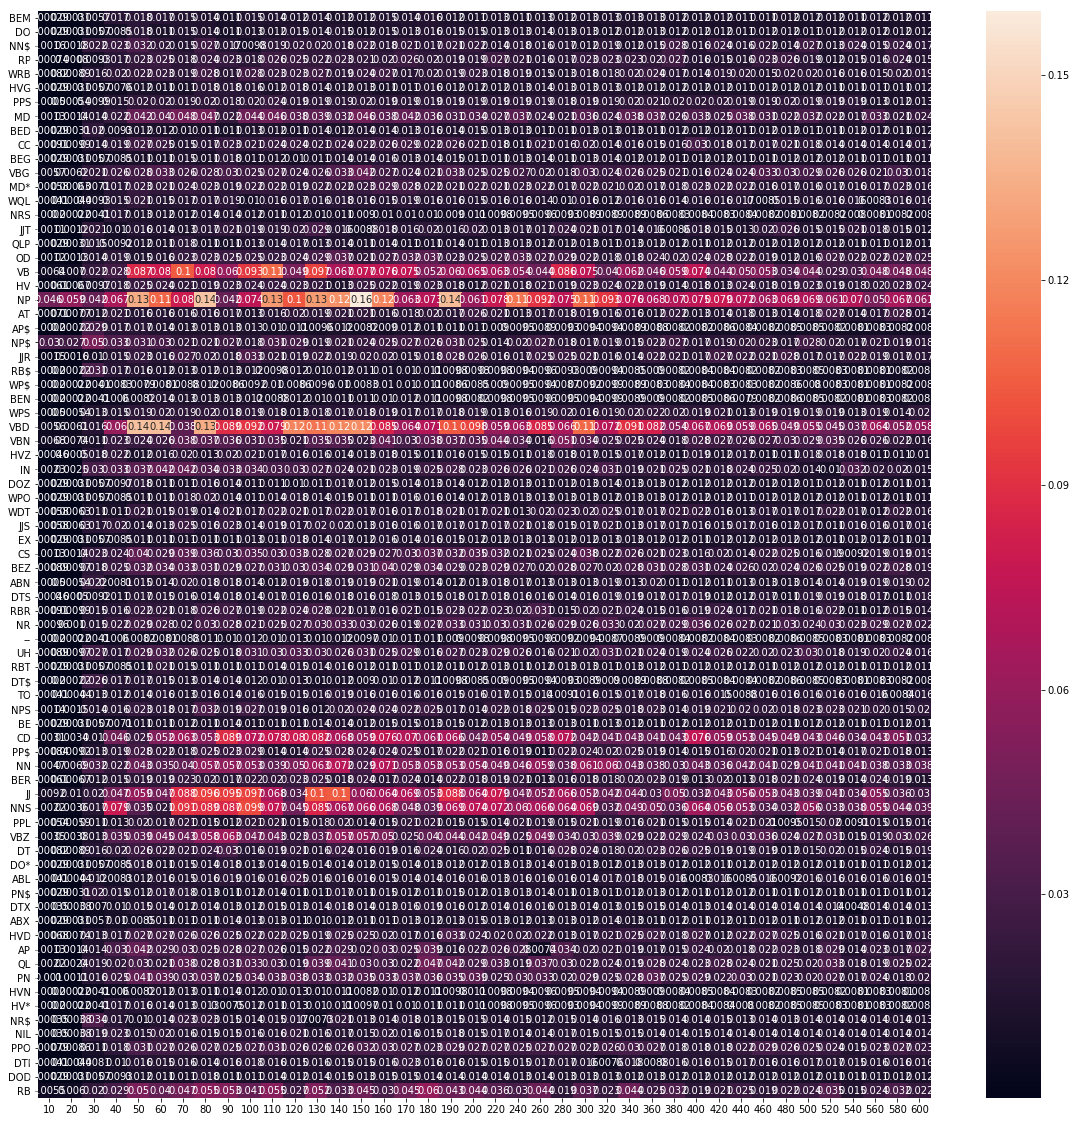

In [44]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

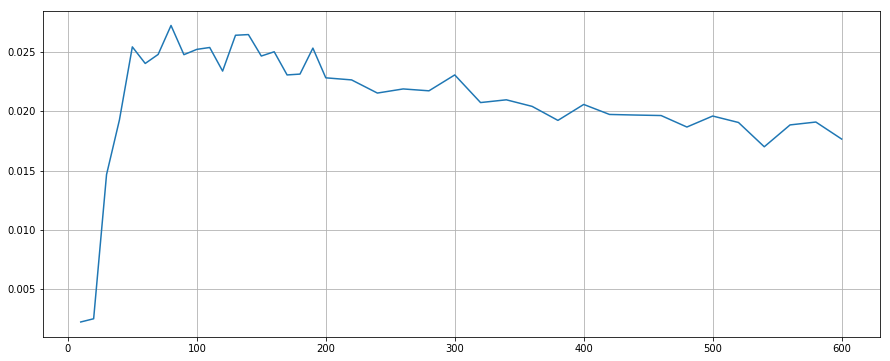

In [45]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True)